# THE BATTLE OF NEIGHBORHOODS - ACCOMMODATION IN MELBOURNE

###### _PEER GRADED ASSIGNMENT_
###### By Ruben de las Heras

### INTRODUCTION 

Australia is a popular destination for travelers around the world. According to Austrade, the country recorded more than 8.5 million visitors in 2019[1]. 

For some people, spending a couple of weeks or a month is not enough. In that regard, a good way to enjoy the 'full Aussie experience' is by living in the country. A very handy and common choice is the Working Holiday Visa, which allows you to live and travel for a year, with a potential extension of an additional one.

As the Department of Home Affairs states, the number of Working Holiday Visa makers in 2019 was 198,293[2]. Out of that figure, the Australian Bureau of Statistics indicates that 17% chooses Melbourne as a destination or starting point[3], making a good 33,701 people.

Moving to another country is such a great experience but like everything in life, it has its difficult part. One of the biggest concerns is finding accommodation. The aim of this report of this study is to help WHM makers, or anyone interested, providing information about rental prices and venues in the main suburbs around the city center.



### TABLE OF CONTENTS

1. Web Scrapping and Data Cleansing
2. Getting Geo Data
3. Creating the map
4. Cluster Neighborhoods
5. Examine Clusters

#### 1. WEB SCRAPPING AND DATA CLEANSING

Firstly, we import the libraries we will need throughout the process.

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim 
!pip install geocoder # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

!pip install beautifulsoup4 # tool to scrap data from a website
from bs4 import BeautifulSoup 
import requests

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.22.0-pyh9f0ad1d_0



geopy-1.22.0         | 63 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: 

Obtaining geographical coordinates of **Melbourne.**

In [2]:
address = 'Melbourne, Australia'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Melbourne, Australia are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Melbourne, Australia are -37.8142176, 144.9631608.


Importing Melbourne *json.*

In [3]:
from urllib.request import urlopen #importing urolopen library from json
import json
with urlopen ('https://raw.githubusercontent.com/Rubendlh/Coursera_Capstone/master/geodata.json') as f:
    melb_geo = json.load(f)

Creating a dataframe extracting the name of the suburbs within.

In [4]:
df=pd.DataFrame()

for type in melb_geo['features']:
    name=type['properties']
    for i in range(0, len(name)):
        df=df.append((name), ignore_index=True)

df.head()

,cartodb_id,created_at,name,updated_at
0,63.0,2015-03-10T04:37:29Z,Balaclava,2015-03-10T04:37:29Z
1,63.0,2015-03-10T04:37:29Z,Balaclava,2015-03-10T04:37:29Z
2,63.0,2015-03-10T04:37:29Z,Balaclava,2015-03-10T04:37:29Z
3,63.0,2015-03-10T04:37:29Z,Balaclava,2015-03-10T04:37:29Z
4,50.0,2015-03-10T04:37:29Z,Windsor,2015-03-10T04:37:29Z


Checking size.

In [5]:
df.shape

(168, 4)

Deleting duplicates.

In [6]:
df.drop_duplicates(inplace=True)
df.head()

,cartodb_id,created_at,name,updated_at
0,63.0,2015-03-10T04:37:29Z,Balaclava,2015-03-10T04:37:29Z
4,50.0,2015-03-10T04:37:29Z,Windsor,2015-03-10T04:37:29Z
8,1.0,2015-03-10T04:37:29Z,Fairfield,2015-03-10T04:37:29Z
12,31.0,2015-03-10T04:37:29Z,Cremorne,2015-03-10T04:37:29Z
16,6.0,2015-03-10T04:37:29Z,Fitzroy North,2015-03-10T04:37:29Z


Checking new size.

In [7]:
df.shape

(42, 4)

Resetting index.

In [8]:
df.reset_index(drop=True, inplace=True)
df.head()

,cartodb_id,created_at,name,updated_at
0,63.0,2015-03-10T04:37:29Z,Balaclava,2015-03-10T04:37:29Z
1,50.0,2015-03-10T04:37:29Z,Windsor,2015-03-10T04:37:29Z
2,1.0,2015-03-10T04:37:29Z,Fairfield,2015-03-10T04:37:29Z
3,31.0,2015-03-10T04:37:29Z,Cremorne,2015-03-10T04:37:29Z
4,6.0,2015-03-10T04:37:29Z,Fitzroy North,2015-03-10T04:37:29Z


Creating data for the rent.

In [9]:
rent = {'price': [216, 244, 197, 238, 238, 216, 242, 223, 192, 235, 234, 252, 212, 253, 240, 212, 244, 250, 208, 271, 234, 238, 230, 285, 288, 285, 244, 259, 264, 250, 237, 212, 220, 264, 206, 264, 242, 213, 242, 247, 264, 250 ]}
dfrent = pd.DataFrame (rent, columns = ['price'])
print(dfrent)

    price
0     216
1     244
2     197
3     238
4     238
5     216
6     242
7     223
8     192
9     235
10    234
11    252
12    212
13    253
14    240
15    212
16    244
17    250
18    208
19    271
20    234
21    238
22    230
23    285
24    288
25    285
26    244
27    259
28    264
29    250
30    237
31    212
32    220
33    264
34    206
35    264
36    242
37    213
38    242
39    247
40    264
41    250


Creating a new dataframe with the two dataframes.

In [10]:
dfmix=pd.concat([df, dfrent], axis=1)
dfmix

,cartodb_id,created_at,name,updated_at,price
0,63.0,2015-03-10T04:37:29Z,Balaclava,2015-03-10T04:37:29Z,216
1,50.0,2015-03-10T04:37:29Z,Windsor,2015-03-10T04:37:29Z,244
2,1.0,2015-03-10T04:37:29Z,Fairfield,2015-03-10T04:37:29Z,197
3,31.0,2015-03-10T04:37:29Z,Cremorne,2015-03-10T04:37:29Z,238
4,6.0,2015-03-10T04:37:29Z,Fitzroy North,2015-03-10T04:37:29Z,238
5,26.0,2015-03-10T04:37:29Z,Hawthorn,2015-03-10T04:37:29Z,216
6,46.0,2015-03-10T04:37:29Z,Prahran,2015-03-10T04:37:29Z,242
7,3.0,2015-03-10T04:37:29Z,Northcote,2015-03-10T04:37:29Z,223
8,2.0,2015-03-10T04:37:29Z,Thornbury,2015-03-10T04:37:29Z,192
9,11.0,2015-03-10T04:37:29Z,Princes Hill,2015-03-10T04:37:29Z,235


Dropping useless columns.

In [11]:
dfmix.drop(['cartodb_id', 'created_at', 'updated_at',], axis=1, inplace=True)
dfmix

,name,price
0,Balaclava,216
1,Windsor,244
2,Fairfield,197
3,Cremorne,238
4,Fitzroy North,238
5,Hawthorn,216
6,Prahran,242
7,Northcote,223
8,Thornbury,192
9,Princes Hill,235


Renaming *name* column to *suburb*.

In [12]:
dfmix.rename(columns={'name': 'suburb'}, inplace=True)
dfmix.head()

,suburb,price
0,Balaclava,216
1,Windsor,244
2,Fairfield,197
3,Cremorne,238
4,Fitzroy North,238


Plotting our date to have a first glance.

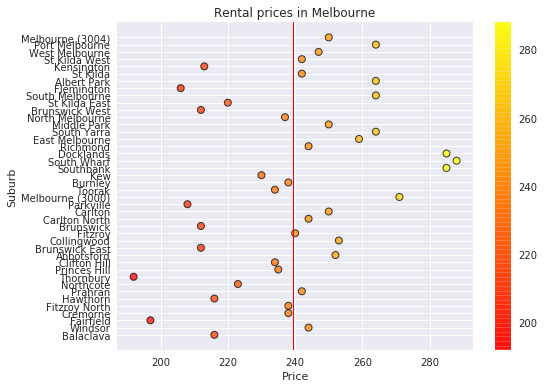

In [13]:
from matplotlib import pyplot as plt #importing library

plt.style.use('seaborn') #defining plot style

plt.scatter(dfmix['price'], dfmix['suburb'], c=dfmix['price'], cmap='autumn', edgecolor='black', linewidth=1, alpha=0.75) #plotting

cbar=plt.colorbar() #adding a colorbar

plt.axvline(dfmix['price'].mean(), color='red', linewidth=1) #adding mean line

plt.title('Rental prices in Melbourne') #adding titles
plt.xlabel('Price')
plt.ylabel('Suburb')

plt.tight_layout()

#### 2. GETTING GEODATA

Obtaining geographical coordinates for each suburb.

In [14]:
list_lat=[] #creating a dict
list_long=[]

for index, row in dfmix.iterrows(): #creating the repeating call 

    city = row['suburb']
    country = "Australia"       
    test = geolocator.geocode(city +','+ country)
    
    lat=test.latitude
    long=test.longitude
    
    list_lat.append(lat) #appending values
    list_long.append(long)

dfmix['lat']=list_lat #creating the new columns
dfmix['long']=list_long

dfmix

,suburb,price,lat,long
0,Balaclava,216,-37.869921,144.993428
1,Windsor,244,-33.605534,150.821953
2,Fairfield,197,-33.867440,150.889310
3,Cremorne,238,-33.826008,151.225433
4,Fitzroy North,238,-37.783332,144.983707
5,Hawthorn,216,-37.824425,145.031721
6,Prahran,242,-37.851914,145.000599
7,Northcote,223,-37.773080,145.010325
8,Thornbury,192,-37.755028,144.998614
9,Princes Hill,235,-37.781804,144.966567


#### 3. CREATING THE MAP

Creating a map.

In [15]:
# create a plain map of Melbourne
map1 = folium.Map(location=[latitude, longitude], zoom_start=10)

# add the data
map1.choropleth(
    geo_data=melb_geo,
    data=dfmix,
    columns=['suburb', 'price'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Average price for room in Melbourne'
)

# add markers to map
for lat, lng, name in zip(dfmix['lat'], dfmix['long'], dfmix['suburb']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.Circle(
        [lat, lng],
        radius=100,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map1) 
    
# display map
map1

Defining FourSquare credentials and version.

In [16]:
CLIENT_ID = 'SCZAK0WAU2AYVSTI1W2DXYNEI04TIM04BYE2R1F20FEKH2OK' # your Foursquare ID
CLIENT_SECRET = 'WIDRMWT5JE3CYCPXSN0OKX2HVWBTXZ5SP0WIAH0XGLHAEK5X'# your Foursquare Secret
VERSION = '20180605' # Foursquare API version
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: SCZAK0WAU2AYVSTI1W2DXYNEI04TIM04BYE2R1F20FEKH2OK
CLIENT_SECRET:WIDRMWT5JE3CYCPXSN0OKX2HVWBTXZ5SP0WIAH0XGLHAEK5X


Getting the suburb´s latitude and longitude.

In [17]:
dfmelbs=dfmix
dfmelbs_latitude = dfmelbs.loc[0, 'lat'] # neighborhood latitude value
dfmelbs_longitude = dfmelbs.loc[0, 'long'] # neighborhood longitude value

dfmelbs_name = dfmelbs.loc[0, 'suburb'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(dfmelbs_name, 
                                                               dfmelbs_latitude, 
                                                               dfmelbs_longitude))

Latitude and longitude values of Balaclava are -37.86992145, 144.99342786739248.


Creating the GET request URL.

In [18]:
LIMIT = 50

radius = 1000

url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(
     CLIENT_ID, CLIENT_SECRET, dfmelbs_latitude, dfmelbs_longitude, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=SCZAK0WAU2AYVSTI1W2DXYNEI04TIM04BYE2R1F20FEKH2OK&client_secret=WIDRMWT5JE3CYCPXSN0OKX2HVWBTXZ5SP0WIAH0XGLHAEK5X&ll=-37.86992145,144.99342786739248&v=20180605&radius=1000&limit=50'

Sending the GET request.

In [19]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ed2994140a7ea001b9fbb23'},
 'response': {'headerLocation': 'Current map view',
  'headerFullLocation': 'Current map view',
  'headerLocationGranularity': 'unknown',
  'totalResults': 42,
  'suggestedBounds': {'ne': {'lat': -37.86092144099999,
    'lng': 145.00480756269542},
   'sw': {'lat': -37.87892145900001, 'lng': 144.98204817208955}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4fee9357e4b0ac0d2eedb1b4',
       'name': 'Yo-Chi',
       'location': {'address': '292 Carlisle st',
        'lat': -37.86878433455922,
        'lng': 144.99386278427554,
        'labeledLatLngs': [{'label': 'display',
          'lat': -37.86878433455922,
          'lng': 144.99386278427554}],
        'distance': 132,
        'postalCode': '3183',
   

Extracting the category types.

In [20]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Cleaning the json and structuring it into a dataframe.

In [21]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Yo-Chi,Ice Cream Shop,-37.868784,144.993863
1,Batch Espresso,Coffee Shop,-37.868973,144.995252
2,Ziggy's Eatery,Burger Joint,-37.868728,144.993292
3,Si Señor Art Taqueria,Taco Place,-37.868758,144.993244
4,Dana Patisserie,Dessert Shop,-37.868629,144.992603


Checking number of venues.

In [22]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

42 venues were returned by Foursquare.


Creating a function to repeat the process to all the suburbs.

In [23]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Suburb', 
                  'Suburb Latitude', 
                  'Suburb Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Running the above function on each neighborhood and creating a new dataframe called *melbourne_venues*.

In [24]:
melbourne_venues = getNearbyVenues(names=dfmelbs['suburb'],
                                   latitudes=dfmelbs['lat'],
                                   longitudes=dfmelbs['long']
                                  )


Balaclava
Windsor
Fairfield
Cremorne
Fitzroy North
Hawthorn
Prahran
Northcote
Thornbury
Princes Hill
Clifton Hill
Abbotsford
Brunswick East
Collingwood
Fitzroy
Brunswick
Carlton North
Carlton
Parkville
Melbourne (3000)
Toorak
Burnley
Kew
Southbank
South Wharf
Docklands
Richmond
East Melbourne
South Yarra
Middle Park
North Melbourne
Brunswick West
St Kilda East
South Melbourne
Flemington
Albert Park
St Kilda
Kensington
St Kilda West
West Melbourne
Port Melbourne
Melbourne (3004)


Checking the size and the dataframe.

In [25]:
print(melbourne_venues.shape)
melbourne_venues.head()

(1066, 7)


,Suburb,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Balaclava,-37.869921,144.993428,Yo-Chi,-37.868784,144.993863,Ice Cream Shop
1,Balaclava,-37.869921,144.993428,Batch Espresso,-37.868973,144.995252,Coffee Shop
2,Balaclava,-37.869921,144.993428,Ziggy's Eatery,-37.868728,144.993292,Burger Joint
3,Balaclava,-37.869921,144.993428,Si Señor Art Taqueria,-37.868758,144.993244,Taco Place
4,Balaclava,-37.869921,144.993428,Dana Patisserie,-37.868629,144.992603,Dessert Shop


Checking the number of venues for each suburb.

In [26]:
melbourne_venues.groupby('Suburb').count()

,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Suburb,,,,,,
Abbotsford,6,6,6,6,6,6
Albert Park,14,14,14,14,14,14
Balaclava,50,50,50,50,50,50
Brunswick,50,50,50,50,50,50
Brunswick East,18,18,18,18,18,18
Brunswick West,10,10,10,10,10,10
Burnley,16,16,16,16,16,16
Carlton,45,45,45,45,45,45
Carlton North,27,27,27,27,27,27


Checking number of unique categories.

In [27]:
print('There are {} uniques categories.'.format(len(melbourne_venues['Venue Category'].unique())))

There are 196 uniques categories.


Analyzing each suburb with one hot encoding.

In [28]:
# one hot encoding
melbourne_onehot = pd.get_dummies(melbourne_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
melbourne_onehot['Suburb'] = melbourne_venues['Suburb'] 

melbourne_onehot.head()

,Adult Boutique,Afghan Restaurant,African Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Basketball Court,Bath House,Beach,Beer Bar,Beer Garden,Bookstore,Boutique,Bowling Green,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Station,Bus Stop,Butcher,Café,Cambodian Restaurant,Camera Store,Casino,Cheese Shop,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Theater,Comic Shop,Convenience Store,Cosmetics Shop,Costume Shop,Cupcake Shop,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Discount Store,Dive Bar,Dumpling Restaurant,Egyptian Restaurant,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Harbor / Marina,Health Food Store,Hockey Arena,Hostel,Hotel,Hotel Bar,Hotel Pool,Hunan Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Kitchen Supply Store,Korean Restaurant,Lebanese Restaurant,Light Rail Station,Liquor Store,Lounge,Malay Restaurant,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Moroccan Restaurant,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nightclub,Noodle House,Office,Organic Grocery,Outlet Mall,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Platform,Playground,Plaza,Pool,Pool Hall,Pub,Racetrack,Rafting,Ramen Restaurant,Record Shop,Restaurant,River,Rock Climbing Spot,Rock Club,Roof Deck,Salad Place,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Soccer Field,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Train Station,Tram Station,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Yunnan Restaurant,Zoo,Zoo Exhibit,Suburb
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Balaclava
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Balaclava
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Balaclava
3,0,0,0,0,0,0,0,0,0,0,0,

Moving *Suburb* column to the first place.

In [29]:
melbourne_grouped = melbourne_onehot.set_index('Suburb').reset_index()
melbourne_grouped.head()

,Suburb,Adult Boutique,Afghan Restaurant,African Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Basketball Court,Bath House,Beach,Beer Bar,Beer Garden,Bookstore,Boutique,Bowling Green,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Station,Bus Stop,Butcher,Café,Cambodian Restaurant,Camera Store,Casino,Cheese Shop,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Theater,Comic Shop,Convenience Store,Cosmetics Shop,Costume Shop,Cupcake Shop,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Discount Store,Dive Bar,Dumpling Restaurant,Egyptian Restaurant,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Harbor / Marina,Health Food Store,Hockey Arena,Hostel,Hotel,Hotel Bar,Hotel Pool,Hunan Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Kitchen Supply Store,Korean Restaurant,Lebanese Restaurant,Light Rail Station,Liquor Store,Lounge,Malay Restaurant,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Moroccan Restaurant,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nightclub,Noodle House,Office,Organic Grocery,Outlet Mall,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Platform,Playground,Plaza,Pool,Pool Hall,Pub,Racetrack,Rafting,Ramen Restaurant,Record Shop,Restaurant,River,Rock Climbing Spot,Rock Club,Roof Deck,Salad Place,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Soccer Field,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Train Station,Tram Station,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Yunnan Restaurant,Zoo,Zoo Exhibit
0,Balaclava,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Balaclava,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Balaclava,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Balaclava,0,0,0,0,0,0,

Checking new size.

In [30]:
melbourne_onehot.shape

(1066, 197)

Next, let's group rows by *Suburb* and by taking the mean of the frequency of occurrence for each category.

In [31]:
melbourne_grouped = melbourne_onehot.groupby('Suburb').mean().reset_index()
melbourne_grouped

,Suburb,Adult Boutique,Afghan Restaurant,African Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Basketball Court,Bath House,Beach,Beer Bar,Beer Garden,Bookstore,Boutique,Bowling Green,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Station,Bus Stop,Butcher,Café,Cambodian Restaurant,Camera Store,Casino,Cheese Shop,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Theater,Comic Shop,Convenience Store,Cosmetics Shop,Costume Shop,Cupcake Shop,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Discount Store,Dive Bar,Dumpling Restaurant,Egyptian Restaurant,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Harbor / Marina,Health Food Store,Hockey Arena,Hostel,Hotel,Hotel Bar,Hotel Pool,Hunan Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Kitchen Supply Store,Korean Restaurant,Lebanese Restaurant,Light Rail Station,Liquor Store,Lounge,Malay Restaurant,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Moroccan Restaurant,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nightclub,Noodle House,Office,Organic Grocery,Outlet Mall,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Platform,Playground,Plaza,Pool,Pool Hall,Pub,Racetrack,Rafting,Ramen Restaurant,Record Shop,Restaurant,River,Rock Climbing Spot,Rock Club,Roof Deck,Salad Place,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Soccer Field,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Train Station,Tram Station,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Yunnan Restaurant,Zoo,Zoo Exhibit
0,Abbotsford,0.000000,0.00,0.00,0.00,0.00000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.333333,0.00,0.000000,0.00000,0.000000,0.000000,0.000000,0.00,0.000000,0.000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00000,0.00000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00000,0.000000,0.00,0.000000,0.00,0.00,0.166667,0.000000,0.00000,0.000000,0.166667,0.000,0.000000,0.00,0.0,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.00000,0.000000,0.000000,0.00,0.0000,0.000

Checking new size.

In [32]:
melbourne_grouped.shape

(42, 197)

Printing each neighborhood along the top 5 venues.

In [33]:
num_top_venues = 5

for suburb in melbourne_grouped['Suburb']:
    print("----"+suburb+"----")
    temp = melbourne_grouped[melbourne_grouped['Suburb'] == suburb].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Abbotsford----
             venue  freq
0             Café  0.33
1        Wine Shop  0.17
2  Thai Restaurant  0.17
3      Pizza Place  0.17
4             Park  0.17


----Albert Park----
             venue  freq
0             Café  0.29
1    Grocery Store  0.14
2      Golf Course  0.07
3  Thai Restaurant  0.07
4     Tennis Court  0.07


----Balaclava----
                   venue  freq
0                   Café  0.18
1            Coffee Shop  0.06
2                    Bar  0.04
3  Vietnamese Restaurant  0.04
4         Breakfast Spot  0.04


----Brunswick----
           venue  freq
0           Café  0.22
1            Bar  0.12
2  Grocery Store  0.06
3    Pizza Place  0.04
4    Supermarket  0.04


----Brunswick East----
                venue  freq
0                Café  0.28
1                Park  0.11
2  Italian Restaurant  0.06
3         Coffee Shop  0.06
4      Chocolate Shop  0.06


----Brunswick West----
                venue  freq
0  Italian Restaurant   0.2
1   Fish & Chips Shop

Let´s put that into a dataframe. First, we write a function to sort the venues in descending order.

In [34]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Creating the new dataframe and displaying the 10 top venues.

In [35]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Suburb']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
suburbs_venues_sorted = pd.DataFrame(columns=columns)
suburbs_venues_sorted['Suburb'] = melbourne_grouped['Suburb']

for ind in np.arange(melbourne_grouped.shape[0]):
    suburbs_venues_sorted.iloc[ind, 1:] = return_most_common_venues(melbourne_grouped.iloc[ind, :], num_top_venues)

suburbs_venues_sorted.head()

,Suburb,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abbotsford,Café,Wine Shop,Pizza Place,Thai Restaurant,Park,Zoo Exhibit,Fish & Chips Shop,French Restaurant,Food Truck,Food Court
1,Albert Park,Café,Grocery Store,Indian Restaurant,Athletics & Sports,Racetrack,Tennis Court,Thai Restaurant,Golf Course,Light Rail Station,Hotel
2,Balaclava,Café,Coffee Shop,Bar,Breakfast Spot,Vietnamese Restaurant,Clothing Store,Mediterranean Restaurant,Gastropub,Japanese Restaurant,Spa
3,Brunswick,Café,Bar,Grocery Store,Pizza Place,Supermarket,Thrift / Vintage Store,Middle Eastern Restaurant,Mexican Restaurant,Climbing Gym,Clothing Store
4,Brunswick East,Café,Park,Pub,Coffee Shop,Southern / Soul Food Restaurant,Middle Eastern Restaurant,Thai Restaurant,Bakery,Grocery Store,Chocolate Shop


#### 4. CLUSTER SUBURBS

Run *k*-means to cluster the neighborhood into 5 clusters.

In [36]:
# set number of clusters
kclusters = 5

melbourne_grouped_clustering = melbourne_grouped.drop('Suburb', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(melbourne_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 3, 0, 3, 0, 0], dtype=int32)

Creating a new dataframe that includes the clusters as well as the top 10 venues for each neighborhood.

In [37]:
# add clustering labels
suburbs_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

melbourne_merged = dfmelbs

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
melbourne_merged = melbourne_merged.join(suburbs_venues_sorted.set_index('suburb'), on='Suburb')

melbourne_merged.head() # check the last columns!

KeyError: "None of ['suburb'] are in the columns"

In [ ]:
melbourne_merged = dfmelbs

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
melbourne_merged = melbourne_merged.join(suburbs_venues_sorted.set_index('Suburb'), on='suburb')

melbourne_merged.head() # check the last columns!

Creating a map to visualize the results.

In [ ]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(melbourne_merged['lat'], melbourne_merged['long'], melbourne_merged['suburb'], melbourne_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[-1],
        fill=True,
        fill_color=rainbow[-2],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### 5. EXAMINE CLUSTERS

*Cluster 1*

In [ ]:
melbourne_merged.loc[melbourne_merged['Cluster Labels'] == 0, melbourne_merged.columns[[0] + list(range(5, melbourne_merged.shape[1]))]]

*Cluster 2*

In [ ]:
melbourne_merged.loc[melbourne_merged['Cluster Labels'] == 1, melbourne_merged.columns[[0] + list(range(5, melbourne_merged.shape[1]))]]

*Cluster 3*

In [ ]:
melbourne_merged.loc[melbourne_merged['Cluster Labels'] == 2, melbourne_merged.columns[[0] + list(range(5, melbourne_merged.shape[1]))]]

*Cluster 4*

In [ ]:
melbourne_merged.loc[melbourne_merged['Cluster Labels'] == 3, melbourne_merged.columns[[0] + list(range(5, melbourne_merged.shape[1]))]]

*Cluster 5*

In [ ]:
melbourne_merged.loc[melbourne_merged['Cluster Labels'] == 4, melbourne_merged.columns[[0] + list(range(5, melbourne_merged.shape[1]))]]

Creating a map to see the results.

In [ ]:
# create a plain map of Melbourne
melbourne_map = folium.Map(location=[latitude, longitude], zoom_start=10)

# add the data
melbourne_map.choropleth(
    geo_data=melb_geo,
    data=dfmix,
    columns=['suburb', 'price'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Average price for room in Melbourne'
)

# add markers to map
for idx in range(len(melbourne_merged)):
    html_label = ''
    
    lat = melbourne_merged['lat'].loc[idx]
    lng = melbourne_merged['long'].loc[idx]
    suburb = melbourne_merged['suburb'].loc[idx]
    cluster = melbourne_merged['Cluster Labels'].loc[idx]
    price = melbourne_merged['price'].loc[idx]
    
    if (cluster == 0):
        area = 'Social'
    elif (cluster == 3):
        area = 'Nightlife / Touristic'
    else: area = 'Commercial / Residential'
    
    html_label = '</h4><h5><b> Suburb: </b>' + suburb + '</h4><h5><b> Area: </b>' + area + '</h5><h5><b> Price: </b>' + '$' + str(price) + '</h5><h5><b> Top 10 Venues: </b></h5><h5><ol>'
    
    for col in range(5, 15):
        html_label += '<li>' + melbourne_merged.iloc[idx, col]

    html_label += '</ol></h5>'
    
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=html_label,
        color=rainbow[cluster],
        fill=True,
        fill_color='#3186cc[cluster]',
        fill_opacity=0.7).add_to(melbourne_map) 
    
# display map
melbourne_map